## DSS 615 - Fall 2021 Assignments
## Assignment-4B
Modified: 9/10/2021

Submit entire notebook as one file. Note there are several exercises in this assignment. **Remember to add your last name to the file name.** 


Student Name: **CHANGE THIS TO YOUR NAME**

# Intro to Data Science: Transforming COVID-19 Data with Pandas

The purpose of this assignment is to transform the existing data file to a new format. 

You will: 
* Determine the 10 states or territories with the most cases or deaths in the US, YTD.
* Filter the data frame to include only those 10 states and territories and the columns date, state, positive, and death.
* Complete various data frame operations
* Create a simple bar chart show the top ten states

Note: more details in the cells below. Read them carefully

**LOOK at all output in notebook before restarting and clearing output. This will help you know what you are trying to create.**

# Retrieving daily COVID-19 data with `pandas`

Source: https://covidtracking.com

daily.csv
* cases are cummulative
* summarized daily by state
* we don't need all columns, just cummulative pos/neg test, date, state
* entire data dictionary at https://covidtracking.com/about-data/data-definitions

In [1]:
# need now
import pandas as pd
from datetime import datetime

# need later
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# get data and put into pandas data frame
url = 'https://covidtracking.com/api/v1/states/daily.csv'

# create a pandas data frame from the csv file stored on internet
#       (do not use a local file since professor won't have access to it)

# vvv Your code below vvv


# ^^^ Your code above ^^^


df    # show head and tail of data frame

,date,state,death
0,20200913,AK,44.0
1,20200913,AL,2351.0
2,20200913,AR,981.0
3,20200913,AS,0.0
4,20200913,AZ,5322.0
5,20200913,CA,14329.0
6,20200913,CO,1889.0
7,20200913,CT,4480.0
8,20200913,DC,616.0
9,20200913,DE,615.0


In [3]:
## NO NEW CODE IN THIS CELL

# convert date from integer yyyymmdd to date format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d').dt.strftime("%Y-%m-%d")

# convert non-missing postitive and negative from float to int

df.death = df.death.fillna(0.0).astype(int) 
 
df  # not required but let's us see transformation

,date,state,death
0,2020-09-13,AK,44
1,2020-09-13,AL,2351
2,2020-09-13,AR,981
3,2020-09-13,AS,0
4,2020-09-13,AZ,5322
5,2020-09-13,CA,14329
6,2020-09-13,CO,1889
7,2020-09-13,CT,4480
8,2020-09-13,DC,616
9,2020-09-13,DE,615


## Determine States with Most Deaths
* Create a new dataframe of just the states with the top cumulative deaths
* Create a list of the top ten state names
* Add a rank column to the new dataframe
* Create a bar chart


In [4]:
# Step 1: Filter dataframe to just the most current data  (or max date or max date - 1)
#       Do not assign to an object. View the output to confirm most recent data

# vvv Your code below vvv


# ^^^ Your code above ^^^


,date,state,death
0,2020-09-13,AK,44
1,2020-09-13,AL,2351
2,2020-09-13,AR,981
3,2020-09-13,AS,0
4,2020-09-13,AZ,5322
5,2020-09-13,CA,14329
6,2020-09-13,CO,1889
7,2020-09-13,CT,4480
8,2020-09-13,DC,616
9,2020-09-13,DE,615


In [5]:
# Step 2: Copy/paste previous cell's to this cell
# Chain to the previous code to sort values in descending order of deaths

# vvv Your code below vvv


# ^^^ Your code above ^^^

# Show output of new dataframe
df_death

,date,state,death
37,2020-09-13,NY,25390
34,2020-09-13,NJ,16031
5,2020-09-13,CA,14329
47,2020-09-13,TX,14190
10,2020-09-13,FL,12764
21,2020-09-13,MA,9210
16,2020-09-13,IL,8541
41,2020-09-13,PA,7837
24,2020-09-13,MI,6911
11,2020-09-13,GA,6333


In [17]:
# Step 3: Create new dataframe named df_topdeaths
# Use iloc to show just the first 10 rows,
# We want this to become independent of the previous dataframe so use COPY. 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html

# vvv Your code below vvv


# ^^^ Your code above ^^^
df_topdeaths

,date,state,death
37,2020-09-13,NY,25390
34,2020-09-13,NJ,16031
5,2020-09-13,CA,14329
47,2020-09-13,TX,14190
10,2020-09-13,FL,12764
21,2020-09-13,MA,9210
16,2020-09-13,IL,8541
41,2020-09-13,PA,7837
24,2020-09-13,MI,6911
11,2020-09-13,GA,6333


In [19]:
# Step 4: Add ranks
# Add a column to the data frame called rank. Replace it with the decending rank of deaths.
# Most deaths would be rank of one. Use pandas rank function. One line of code.

# vvv Your code below vvv


# ^^^ Your code above ^^^

df_topdeaths

,date,state,death,rank
37,2020-09-13,NY,25390,1.0
34,2020-09-13,NJ,16031,2.0
5,2020-09-13,CA,14329,3.0
47,2020-09-13,TX,14190,4.0
10,2020-09-13,FL,12764,5.0
21,2020-09-13,MA,9210,6.0
16,2020-09-13,IL,8541,7.0
41,2020-09-13,PA,7837,8.0
24,2020-09-13,MI,6911,9.0
11,2020-09-13,GA,6333,10.0


In [ ]:
# Step 5: Use pandas' tolist function to create a list of the top ten states
#       Name the list topstates, it should only include 10 items

# vvv Your code below vvv


# ^^^ Your code above ^^^# Show output of new list
topstates

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text yticklabel objects>)

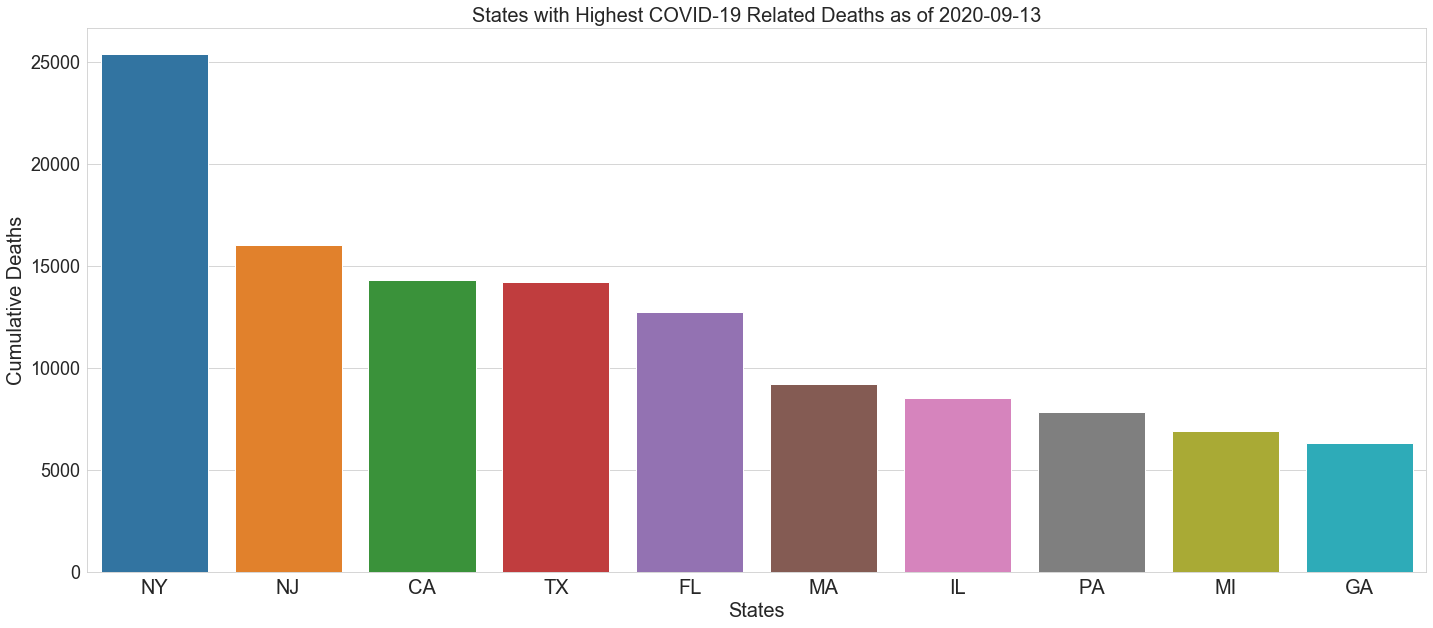

In [46]:
# Step 6: Make a simple bar chart where the x-axis is state and the y-axis is total deaths
# Include a title that shows the date of the data (do not hard code it)
# That date should be the max date of the data frame
# Optional: set a data label at the top of each bar

# vvv Your code below vvv





# ^^^ Your code above ^^^

## Reminder:
*Before submitting:*
* Run all cells
* Save the file
* Be sure your last name is part of the file name